In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = {
    'id':[1,2,3,4,5,6,7,8,9,10],
    'salary':[50000, 100000, 1000000, 70000, 80000, 10000000, 90000, 150000, 5000000, 60000],
    'experience':[2,3,10,3,4,15,4,5,8,1]
}

In [15]:
df = pd.DataFrame(data)

id: 0 outlier detected


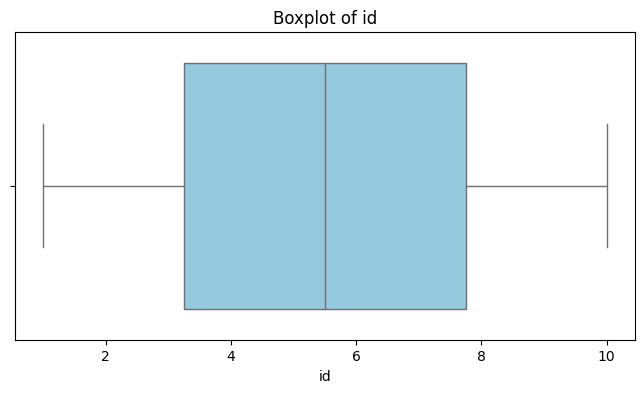

salary: 2 outlier detected


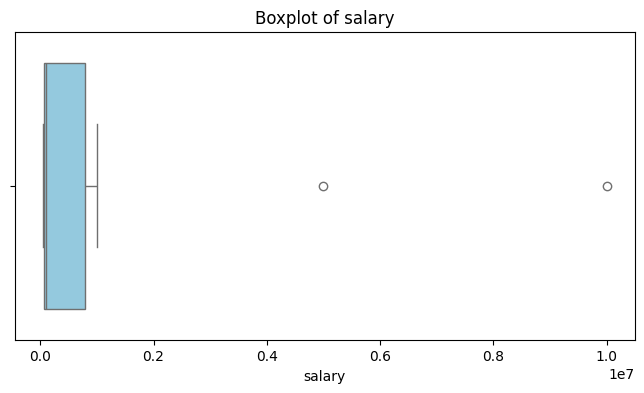

experience: 1 outlier detected


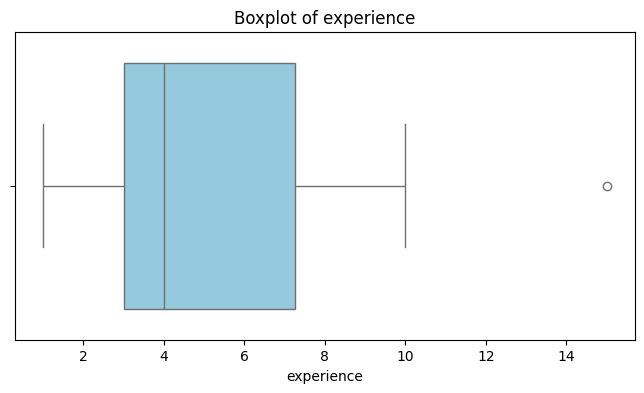

In [17]:
#Detect Outliers in Numerical Columns (Boxplot & IQR Method)
#Question:
#Detect and visualize outliers in numerical columns using the IQR method and Boxplots.

numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

    print(f'{col}: {len(outliers)} outlier detected')

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()
                                

In [23]:
!pip install missingno

In [25]:

data = {
    'id': [1,2,3,4,5,6,7,8],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah'],
    'age': [28, np.nan, 35, 45, 30, np.nan, 40, 38],
    'salary': [70000, 80000, np.nan, 120000, 75000, np.nan, 90000, 85000],
    'department': ['HR', 'Finance', 'IT', np.nan, 'HR', 'Finance', 'IT', 'Finance']
}

df = pd.DataFrame(data)
print(df)

   id     name   age    salary department
0   1    Alice  28.0   70000.0         HR
1   2      Bob   NaN   80000.0    Finance
2   3  Charlie  35.0       NaN         IT
3   4    David  45.0  120000.0        NaN
4   5      Eva  30.0   75000.0         HR
5   6    Frank   NaN       NaN    Finance
6   7    Grace  40.0   90000.0         IT
7   8   Hannah  38.0   85000.0    Finance


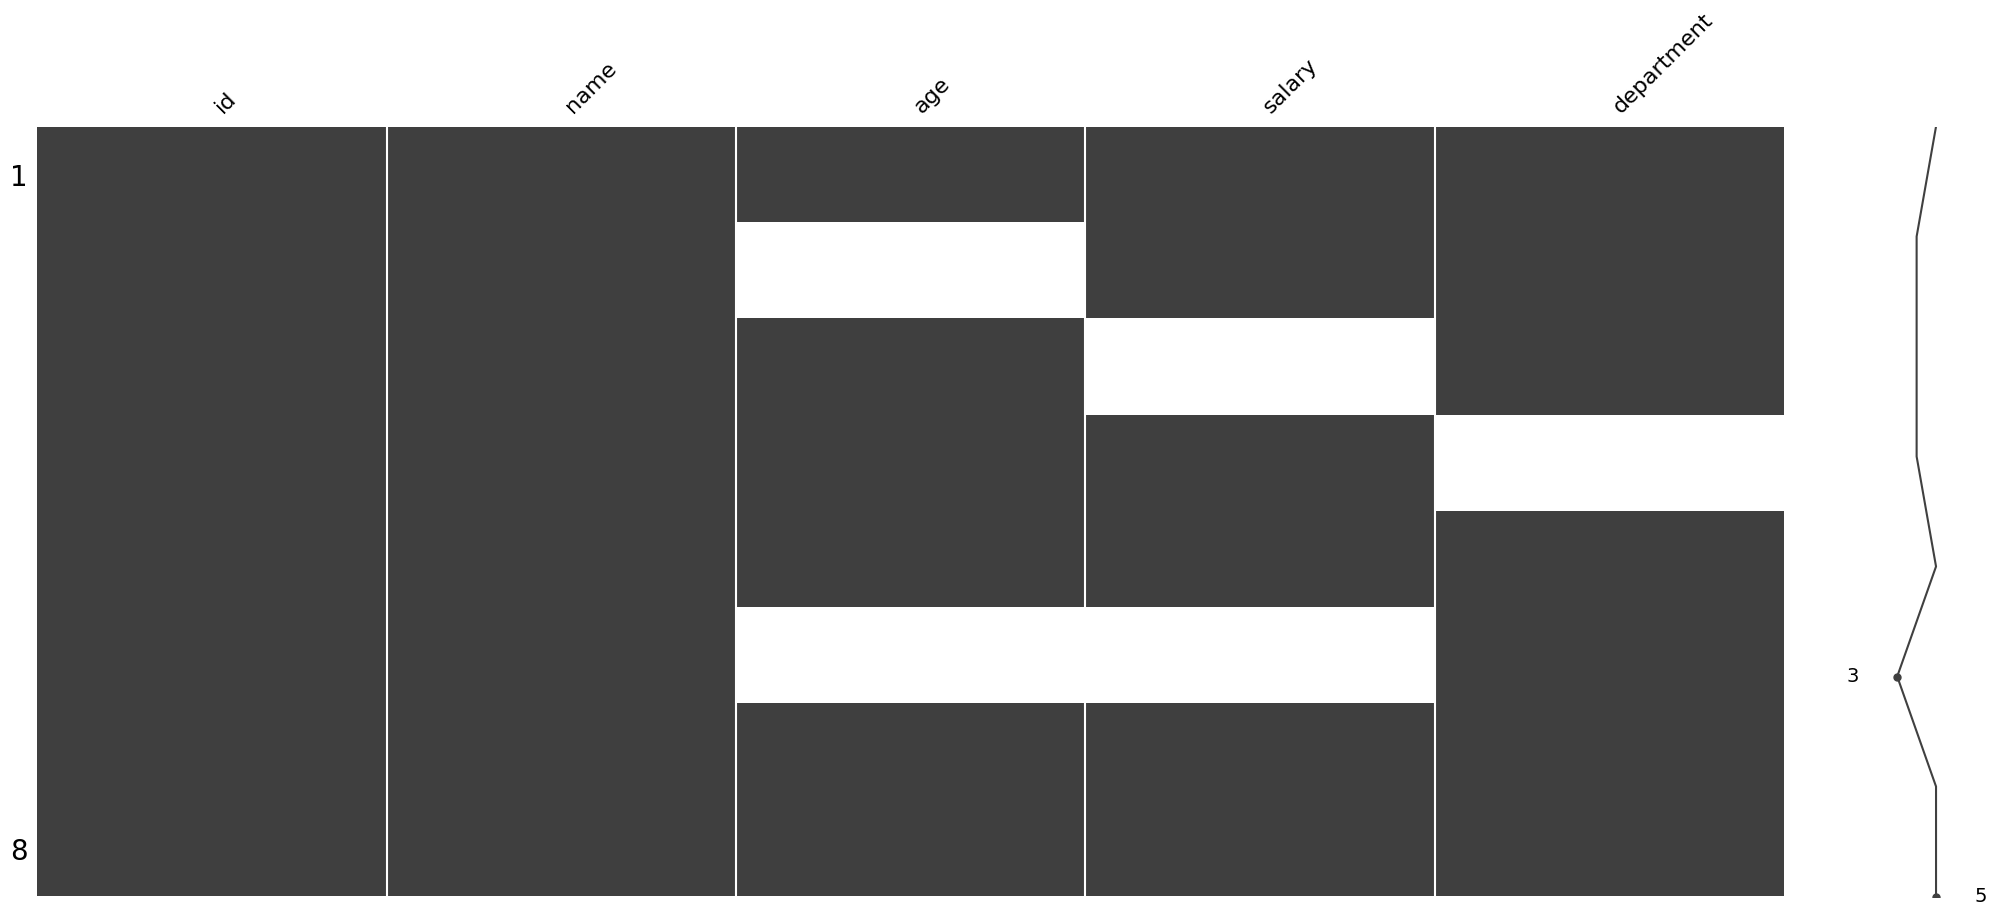

In [27]:
#2️⃣ Analyze Missing Values & Patterns
#Question:
#Find missing values, visualize them, and suggest imputation strategies.

import missingno as msno
msno.matrix(df)

missing = df.isnull().sum()

In [29]:
data = {
    'id': [1,2,3,4,5,6,7,8,9],
    'name': ['John', 'Alice', 'Bob', 'John', 'Charlie', 'Alice', 'David', 'Eva', 'Bob'],
    'age': [25, 30, 28, 25, 35, 30, 40, 22, 28],
    'city': ['New York', 'Chicago', 'Seattle', 'New York', 'Boston', 'Chicago', 'Miami', 'Austin', 'Seattle']
}

df = pd.DataFrame(data)
print(df)

   id     name  age      city
0   1     John   25  New York
1   2    Alice   30   Chicago
2   3      Bob   28   Seattle
3   4     John   25  New York
4   5  Charlie   35    Boston
5   6    Alice   30   Chicago
6   7    David   40     Miami
7   8      Eva   22    Austin
8   9      Bob   28   Seattle


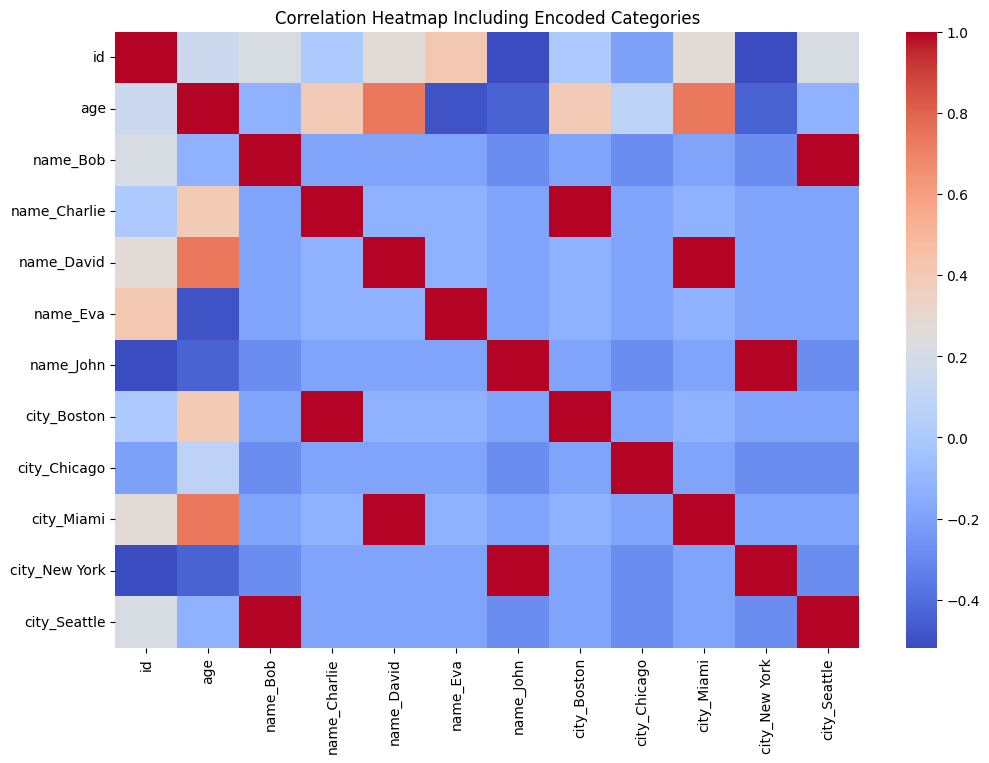

In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap Including Encoded Categories')
plt.show()

In [37]:
#5️⃣ Feature Interaction Analysis (Pairplot + Target Coloring)
#Question:
#Visualize how numerical features interact with each other, colored by the target variable.

data = {
    'id': [1,2,3,4,5,6,7,8,9,10],
    'age': [22, 25, 30, 35, 40, 28, 50, 45, 32, 29],
    'income': [25000, 30000, 40000, 50000, 60000, 35000, 80000, 75000, 42000, 36000],
    'spending_score': [40, 50, 60, 70, 20, 65, 15, 25, 68, 58],
    'target': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
print(df)

   id  age  income  spending_score  target
0   1   22   25000              40       0
1   2   25   30000              50       0
2   3   30   40000              60       1
3   4   35   50000              70       1
4   5   40   60000              20       0
5   6   28   35000              65       1
6   7   50   80000              15       0
7   8   45   75000              25       0
8   9   32   42000              68       1
9  10   29   36000              58       1


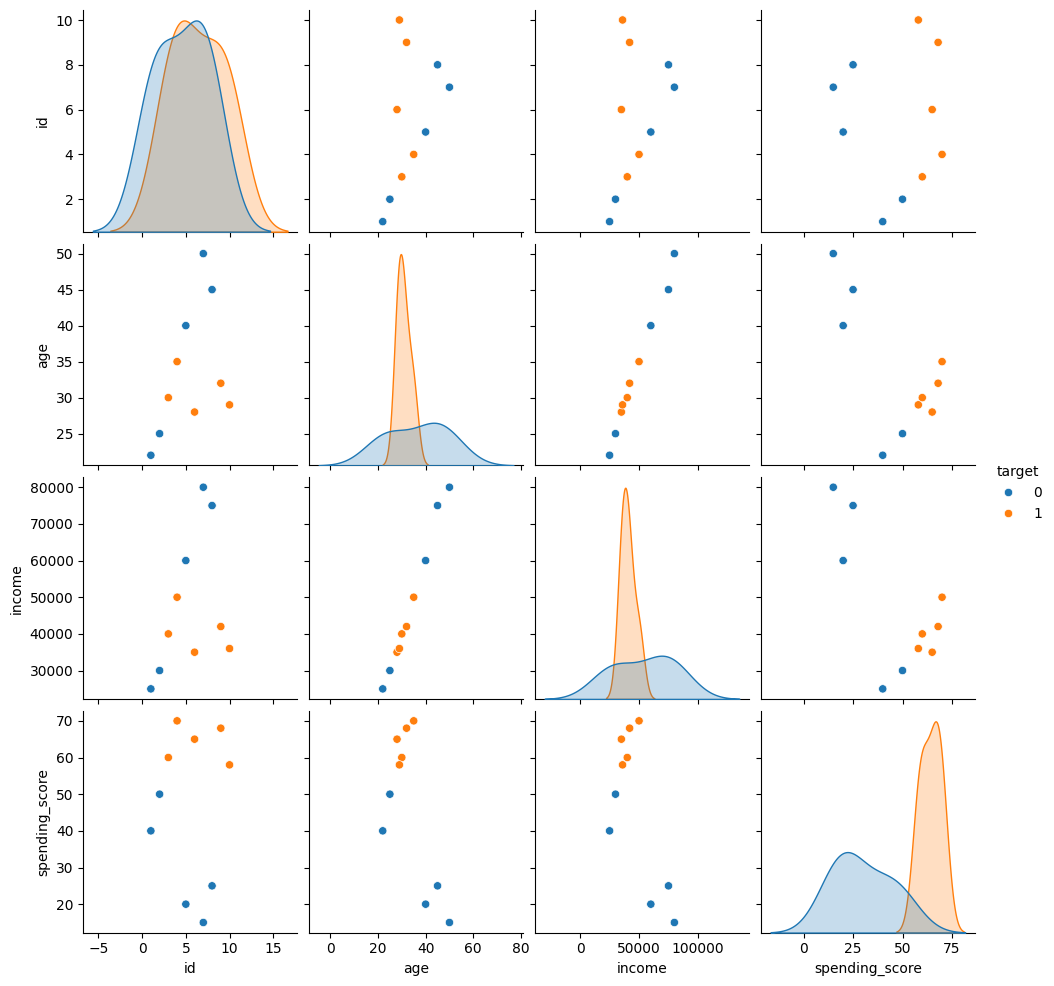

In [39]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()